# Table of Contents for example analysis (Fig. 2A)
 <p><div class="lev1 toc-item"><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></div><div class="lev1 toc-item"><a href="#Load-tRNA-charging-data,-HEK293T-3-hours" data-toc-modified-id="Load-tRNA-charging-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load tRNA charging data, HEK293T 3 hours</a></div><div class="lev1 toc-item"><a href="#Plot-data" data-toc-modified-id="Plot-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot data</a></div>
 
* analysis is repeated for all measurements of tRNA charging below: Supp. Fig. 2C; Supp. Fig. 4A,C,E,H

# Import libraries

In [1]:
library(tidyverse)
library(Cairo)
options(warn=-1)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica", base_size = 8) +
theme(          
  strip.background = element_blank(),
  strip.text.x = element_text(size = 8),
  axis.line = element_line(size = .25),
  axis.ticks = element_line(size = .25),
  axis.text.x = element_text(size = 8, color = 'black'),
  axis.text.y = element_text(size = 8, color = 'black'),
  legend.text = element_text(size = 8),
    
))

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘purrr’ was built under R version 3.4.1”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Load tRNA charging data, HEK293T 3 hours

In [2]:
datafiles <- '../rawdata/tRNA_charging_blots/fig2/WT_arg_acgccgtcg_leu_caacagtagaag_3h/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2)
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  print

# A tibble: 21 x 7
   aatrna  trna samplelabel mean_chargedfraction      stdev     stderr    aa
    <chr> <chr>       <chr>                <dbl>      <dbl>      <dbl> <chr>
 1 argacg   ACG        Rich            0.7395623 0.08316640 0.04801615   arg
 2 argacg   ACG        –Leu            0.7328162 0.10926492 0.06308413   arg
 3 argacg   ACG        –Arg            0.2232467 0.05863257 0.03385153   arg
 4 argccg   CCG        Rich            0.8675503 0.06221034 0.03591716   arg
 5 argccg   CCG        –Leu            0.7800130 0.06160341 0.03556674   arg
 6 argccg   CCG        –Arg            0.4946929 0.06471545 0.03736348   arg
 7 argtcg   TCG        Rich            0.8199948 0.01757547 0.01014720   arg
 8 argtcg   TCG        –Leu            0.7769213 0.05845568 0.03374940   arg
 9 argtcg   TCG        –Arg            0.4694101 0.10764675 0.06214988   arg
10 leuaag   AAG        Rich            0.7234322 0.04312285 0.02489699   leu
# ... with 11 more rows


# Plot data

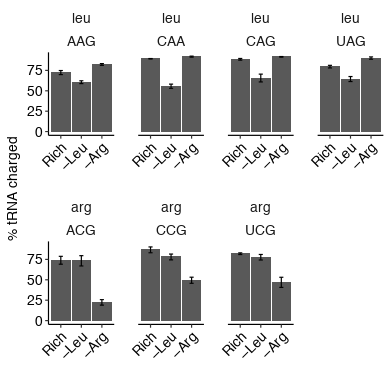

In [4]:
options(repr.plot.width = 3.25, repr.plot.height = 3.2)

data %>% mutate(trna = stringr::str_replace(trna, "T", "U")) %>%
  ggplot(aes(x = forcats::fct_rev(samplelabel), y = mean_chargedfraction * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (mean_chargedfraction - stderr)*100,
                    ymax = (mean_chargedfraction + stderr)*100), 
                width = 0.2, size = 0.25)  +
  facet_wrap(forcats::fct_rev(aa)~trna, ncol = 4, scales = "free_x") +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) 
ggsave("../figures/fig2ab.pdf", width = 3.25, height = 3.2, device = cairo_pdf)

# repeat for HCT116 data, 3 hours (supp. fig. 2c)

In [4]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig2/HCT116_arg_acg_leu_caa_3h/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  print

[1] "argacg" "leucaa"
# A tibble: 6 x 6
  aatrna  trna cell_line samplelabel mean_chargedfraction    aa
   <chr> <chr>     <chr>       <chr>                <dbl> <chr>
1 argacg   ACG    HCT116        Rich            0.7913843   arg
2 argacg   ACG    HCT116        –Leu            0.7777006   arg
3 argacg   ACG    HCT116        –Arg            0.3316211   arg
4 leucaa   CAA    HCT116        Rich            0.8602444   leu
5 leucaa   CAA    HCT116        –Leu            0.7755604   leu
6 leucaa   CAA    HCT116        –Arg            0.8655643   leu


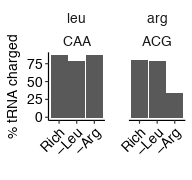

In [11]:
options(repr.plot.width = 1.6, repr.plot.height = 1.5)

data %>% 
  ggplot(aes(x = forcats::fct_rev(samplelabel), y = mean_chargedfraction * 100)) +
  geom_col() +
  #geom_errorbar(aes(ymin = (mean_chargedfraction - stderr)*100,
                    #ymax = (mean_chargedfraction + stderr)*100), 
                #width = 0.2, size = 0.25)  +
  facet_wrap(forcats::fct_rev(aa)~trna, ncol = 4, scales = "free_x") +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) 
ggsave("../figures/suppfig2c.pdf", width = 1.6, height = 1.5, device = cairo_pdf)

# repeat for HEK293T +/- Torin1 data, 3 hours (supp. fig. 4a)

In [4]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig4/293t_torin1_acgccgcaa_3h/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(trna, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

[1] "argacg" "argccg" "leucag"
# A tibble: 18 x 9
   aatrna  trna   samplelabel mean_chargedfraction       stdev      stderr
    <chr> <chr>         <chr>                <dbl>       <dbl>       <dbl>
 1 argacg   ACG          Rich            0.7122704 0.093245086 0.053835075
 2 argacg   ACG Rich + Torin1            0.7009632 0.080094163 0.046242387
 3 argacg   ACG          –Leu            0.7420600 0.046757291 0.026995335
 4 argacg   ACG –Leu + Torin1            0.8169718 0.019164559 0.011064663
 5 argacg   ACG          –Arg            0.1798327 0.044126247 0.025476301
 6 argacg   ACG –Arg + Torin1            0.6658390 0.050394605 0.029095339
 7 argccg   CCG          Rich            0.9142829 0.004799390 0.002770929
 8 argccg   CCG Rich + Torin1            0.8789205 0.007913598 0.004568918
 9 argccg   CCG          –Leu            0.8801972 0.023183965 0.013385269
10 argccg   CCG –Leu + Torin1            0.8757431 0.011157372 0.006441711
11 argccg   CCG          –Arg            0.5377826

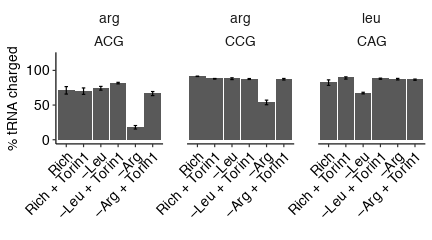

In [7]:
options(repr.plot.width = 3.6, repr.plot.height = 2)

test <- Vectorize(function(x) {
  data %>% select(samplelabel)
})

data %>%
  ggplot(aes(x = xlabel, y = mean_chargedfraction * 100)) +
  geom_col() +
  geom_errorbar(aes(ymin = (mean_chargedfraction - stderr)*100,
                    ymax = (mean_chargedfraction + stderr)*100), 
                width = 0.2, size = 0.25) +
  facet_wrap(~aa ~trna, ncol = 4, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 120)) +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  

ggsave("../figures/suppfig4ab.pdf", width = 3.6, height = 2, device = cairo_pdf)

# repeat for HEK293T +hrGFP, +RagB-Q99L, GCN KO data, 6 hours (supp. fig. 4e)

In [51]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig4/WT_hrGFP_RagBQ99L_GCN2KO_1rep_richleuarg_6h_riboprofB_controls/processeddata'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(cell_line, trna, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

[1] "argacg" "leucaa"
# A tibble: 24 x 10
   aatrna  trna cell_line samplelabel mean_chargedfraction stdev sterr    aa
    <chr> <chr>     <chr>       <chr>                <dbl> <chr> <chr> <chr>
 1 argacg   ACG        WT        Rich            0.8070069  <NA>  <NA>   arg
 2 argacg   ACG     hrGFP        Rich            0.7389354  <NA>  <NA>   arg
 3 argacg   ACG RagB-Q99L        Rich            0.8063565  <NA>  <NA>   arg
 4 argacg   ACG   GCN2-KO        Rich            0.8367921  <NA>  <NA>   arg
 5 argacg   ACG        WT        –Leu            0.8466140  <NA>  <NA>   arg
 6 argacg   ACG     hrGFP        –Leu            0.8489130  <NA>  <NA>   arg
 7 argacg   ACG RagB-Q99L        –Leu            0.8503090  <NA>  <NA>   arg
 8 argacg   ACG   GCN2-KO        –Leu            0.8623414  <NA>  <NA>   arg
 9 argacg   ACG        WT        –Arg            0.3331593  <NA>  <NA>   arg
10 argacg   ACG     hrGFP        –Arg            0.3015906  <NA>  <NA>   arg
# ... with 14 more rows, and 2 mor

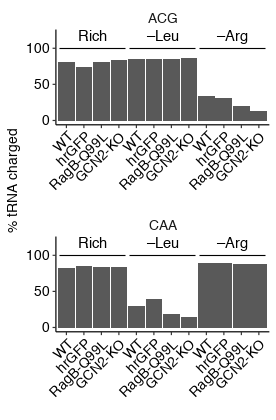

In [52]:
options(repr.plot.width = 2.3, repr.plot.height = 3.5)

test <- Vectorize(function(x) {
  data %>% select(cell_line)
})

data %>%
  ggplot(aes(x = xlabel, y = mean_chargedfraction * 100)) +
  geom_col() +
  facet_wrap(~trna, ncol = 1, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 120)) +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("segment", x = .6, xend = 4.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 2.5, y = 110, label = "Rich", vjust = 0, size = 3) +
  annotate("segment", x = 4.6, xend = 8.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 6.5, y = 110, label = "\u2013Leu", vjust = 0, size = 3) +
  annotate("segment", x = 8.6, xend = 12.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 10.5, y = 110, label = "\u2013Arg", vjust = 0, size = 3) 


ggsave("../figures/suppfig4_6hperturb1rep.pdf", width = 2.3, height = 3.5, device = cairo_pdf)

# repeat for HEK293T +hrGFP, +RagB-Q99L, +Torin1 data, +/- cycloheximide 3 hours (supp. fig. 4h)

In [7]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig4/WT_hrGFP_RagBqQ99L_Torin1_cyclohex_3h/processeddata/'  %>% 
  list.files(pattern = "csv$", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(cell_line, trna, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

[1] "argacg" "argacg" "leucaa"
# A tibble: 24 x 8
   aatrna  trna    cell_line samplelabel mean_chargedfraction    aa
    <chr> <chr>        <chr>       <chr>                <dbl> <chr>
 1 argacg   ACG        hrGFP        Rich            0.8292052   arg
 2 argacg   ACG      RagB-WT        Rich            0.8103393   arg
 3 argacg   ACG    RagB-Q99L        Rich            0.7886003   arg
 4 argacg   ACG hrGFP+Torin1        Rich            0.8475965   arg
 5 argacg   ACG        hrGFP        –Leu            0.8251559   arg
 6 argacg   ACG      RagB-WT        –Leu            0.7969334   arg
 7 argacg   ACG    RagB-Q99L        –Leu            0.8067210   arg
 8 argacg   ACG hrGFP+Torin1        –Leu            0.8372183   arg
 9 argacg   ACG        hrGFP        –Arg            0.6787563   arg
10 argacg   ACG      RagB-WT        –Arg            0.6884856   arg
# ... with 14 more rows, and 2 more variables: xlabel <fctr>, sampleorder <dbl>


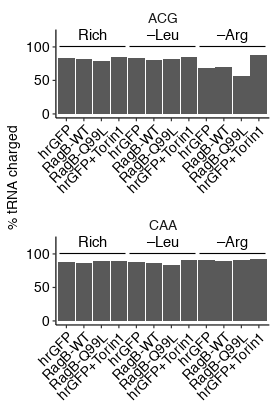

In [14]:
options(repr.plot.width = 2.3, repr.plot.height = 3.5)

test <- Vectorize(function(x) {
  data %>% select(cell_line)
})

data %>%
  ggplot(aes(x = xlabel, y = mean_chargedfraction * 100)) +
  geom_col() +
  facet_wrap(~trna, ncol = 1, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 120)) +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("segment", x = .6, xend = 4.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 2.5, y = 110, label = "Rich", vjust = 0, size = 3) +
  annotate("segment", x = 4.6, xend = 8.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 6.5, y = 110, label = "\u2013Leu", vjust = 0, size = 3) +
  annotate("segment", x = 8.6, xend = 12.4, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 10.5, y = 110, label = "\u2013Arg", vjust = 0, size = 3) 


ggsave("../figures/suppfig4i.pdf", width = 2.3, height = 3.5, device = cairo_pdf)

# repeat for HEK293T +hrGFP, +RagB-WT, +RagB-Q99L data, 3 hours (supp. fig. 4c)

In [26]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig4/20150608_harvest6_hek293t_AAVS1crisprhrGFPRagBWTRagBQ99L_3h_richleuarg/processeddata/'  %>% 
  list.files(pattern = "arg", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(trna, cell_line, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

data

[1] "argacg" "argccg" "argtcg"
# A tibble: 27 x 10
   aatrna  trna cell_line samplelabel mean_chargedfraction      stdev
    <chr> <chr>     <chr>       <chr>                <dbl>      <dbl>
 1 argacg   ACG     hrGFP        Rich            0.8670868 0.01172267
 2 argacg   ACG   RagB-WT        Rich            0.8613701 0.03980591
 3 argacg   ACG RagB-Q99L        Rich            0.8709106 0.02801426
 4 argacg   ACG     hrGFP        –Leu            0.8885709 0.02522602
 5 argacg   ACG   RagB-WT        –Leu            0.8780857 0.02259936
 6 argacg   ACG RagB-Q99L        –Leu            0.8806131 0.03151315
 7 argacg   ACG     hrGFP        –Arg            0.2504738 0.06566611
 8 argacg   ACG   RagB-WT        –Arg            0.3003335 0.13074174
 9 argacg   ACG RagB-Q99L        –Arg            0.2641125 0.01694858
10 argccg   CCG     hrGFP        Rich            0.9286907 0.03733567
# ... with 17 more rows, and 4 more variables: sterr <dbl>, aa <chr>,
#   xlabel <fctr>, sampleorder <dbl>


aatrna,trna,cell_line,samplelabel,mean_chargedfraction,stdev,sterr,aa,xlabel,sampleorder
argacg,ACG,hrGFP,Rich,0.8670868,0.011722668,0.006768085,arg,ACG_hrGFP_Rich,1
argacg,ACG,RagB-WT,Rich,0.8613701,0.039805913,0.022981955,arg,ACG_RagB-WT_Rich,2
argacg,ACG,RagB-Q99L,Rich,0.8709106,0.028014261,0.016174041,arg,ACG_RagB-Q99L_Rich,3
argacg,ACG,hrGFP,–Leu,0.8885709,0.025226018,0.014564248,arg,ACG_hrGFP_–Leu,4
argacg,ACG,RagB-WT,–Leu,0.8780857,0.022599358,0.013047745,arg,ACG_RagB-WT_–Leu,5
argacg,ACG,RagB-Q99L,–Leu,0.8806131,0.031513146,0.018194123,arg,ACG_RagB-Q99L_–Leu,6
argacg,ACG,hrGFP,–Arg,0.2504738,0.065666112,0.037912348,arg,ACG_hrGFP_–Arg,7
argacg,ACG,RagB-WT,–Arg,0.3003335,0.130741742,0.075483780,arg,ACG_RagB-WT_–Arg,8
argacg,ACG,RagB-Q99L,–Arg,0.2641125,0.016948578,0.009785266,arg,ACG_RagB-Q99L_–Arg,9
argccg,CCG,hrGFP,Rich,0.9286907,0.037335667,0.021555757,arg,CCG_hrGFP_Rich,10


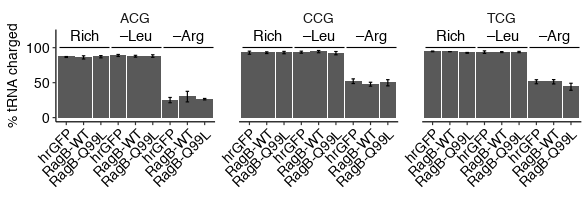

In [44]:
options(repr.plot.width = 4.9, repr.plot.height = 1.75)

test <- Vectorize(function(x) {
  data %>% select(cell_line)
})

data %>%
  ggplot(aes(x = xlabel, y = mean_chargedfraction * 100)) +
  geom_col() + geom_errorbar(aes(ymin = (mean_chargedfraction - sterr)*100,
                    ymax = (mean_chargedfraction + sterr)*100), 
                width = 0.2, size = 0.25) +
  facet_wrap(~trna, ncol = 3, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 120)) +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("segment", x = .6, xend = 3.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 2.05, y = 110, label = "Rich", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 5.05, y = 110, label = "\u2013Leu", vjust = 0, size = 3) +
  annotate("segment", x = 6.6, xend = 9.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 8.05, y = 110, label = "\u2013Arg", vjust = 0, size = 3) 


ggsave("../figures/suppfig4_trna_tbd.pdf", width = 4.9, height = 1.75, device = cairo_pdf)

In [45]:
datafiles <- '../rawdata/tRNA_charging_blots/suppfig4/20150608_harvest6_hek293t_AAVS1crisprhrGFPRagBWTRagBQ99L_3h_richleuarg/processeddata/'  %>% 
  list.files(pattern = "leu", full.names = T)
samplenames <- datafiles %>% 
  stringr::str_match("/([^_/]+)[^/]+$") %>% 
  magrittr::extract(,2) %>%
  print
data <- datafiles %>% 
  lapply(. %>% read_csv(col_types = c(col_character()))) %>% 
  magrittr::set_names(samplenames) %>% 
  bind_rows(.id = 'aatrna') %>% 
  mutate(aa = substr(aatrna, 1, 3)) %>% 
  mutate(samplelabel = stringr::str_replace(samplelabel, '-','\u2013')) %>% 
  mutate(xlabel = paste(trna, cell_line, samplelabel, sep = "_")) %>% 
  mutate(sampleorder = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36)) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, sampleorder)) %>% 
  arrange(sampleorder) %>% 
  print

data

[1] "leuaag" "leucaa" "leucag" "leutag"
# A tibble: 36 x 10
   aatrna  trna cell_line samplelabel mean_chargedfraction      stdev
    <chr> <chr>     <chr>       <chr>                <dbl>      <dbl>
 1 leuaag   AAG     hrGFP        Rich            0.7161863 0.04561394
 2 leuaag   AAG   RagB-WT        Rich            0.7927008 0.06324721
 3 leuaag   AAG RagB-Q99L        Rich            0.8071739 0.01450018
 4 leuaag   AAG     hrGFP        –Leu            0.5912405 0.04521480
 5 leuaag   AAG   RagB-WT        –Leu            0.5506140 0.05061107
 6 leuaag   AAG RagB-Q99L        –Leu            0.3812656 0.07878565
 7 leuaag   AAG     hrGFP        –Arg            0.8229787 0.02024475
 8 leuaag   AAG   RagB-WT        –Arg            0.8301938 0.03805705
 9 leuaag   AAG RagB-Q99L        –Arg            0.8101941 0.02498401
10 leucaa   CAA     hrGFP        Rich            0.8364168 0.06759715
# ... with 26 more rows, and 4 more variables: sterr <dbl>, aa <chr>,
#   xlabel <fctr>, sampleorder

aatrna,trna,cell_line,samplelabel,mean_chargedfraction,stdev,sterr,aa,xlabel,sampleorder
leuaag,AAG,hrGFP,Rich,0.7161863,0.045613941,0.026335221,leu,AAG_hrGFP_Rich,1
leuaag,AAG,RagB-WT,Rich,0.7927008,0.063247214,0.036515796,leu,AAG_RagB-WT_Rich,2
leuaag,AAG,RagB-Q99L,Rich,0.8071739,0.014500184,0.008371685,leu,AAG_RagB-Q99L_Rich,3
leuaag,AAG,hrGFP,–Leu,0.5912405,0.045214803,0.026104779,leu,AAG_hrGFP_–Leu,4
leuaag,AAG,RagB-WT,–Leu,0.5506140,0.050611069,0.029220314,leu,AAG_RagB-WT_–Leu,5
leuaag,AAG,RagB-Q99L,–Leu,0.3812656,0.078785649,0.045486916,leu,AAG_RagB-Q99L_–Leu,6
leuaag,AAG,hrGFP,–Arg,0.8229787,0.020244749,0.011688311,leu,AAG_hrGFP_–Arg,7
leuaag,AAG,RagB-WT,–Arg,0.8301938,0.038057051,0.021972249,leu,AAG_RagB-WT_–Arg,8
leuaag,AAG,RagB-Q99L,–Arg,0.8101941,0.024984013,0.014424527,leu,AAG_RagB-Q99L_–Arg,9
leucaa,CAA,hrGFP,Rich,0.8364168,0.067597150,0.039027233,leu,CAA_hrGFP_Rich,10


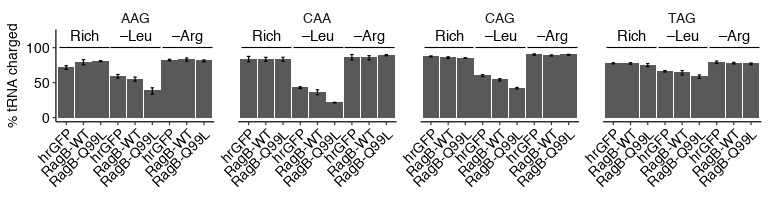

In [50]:
options(repr.plot.width = 6.4, repr.plot.height = 1.75)

test <- Vectorize(function(x) {
  data %>% select(cell_line)
})

data %>%
  ggplot(aes(x = xlabel, y = mean_chargedfraction * 100)) +
  geom_col() + geom_errorbar(aes(ymin = (mean_chargedfraction - sterr)*100,
                    ymax = (mean_chargedfraction + sterr)*100), 
                width = 0.2, size = 0.25) +
  facet_wrap(~trna, ncol = 4, scales = "free_x") +
  scale_x_discrete(labels = test) +
  scale_y_continuous(breaks= scales::pretty_breaks(n=3), limits = c(0, 120)) +
  xlab("") + ylab("% tRNA charged") +
  theme(panel.spacing = unit(1, "lines"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  annotate("segment", x = .6, xend = 3.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 2.05, y = 110, label = "Rich", vjust = 0, size = 3) +
  annotate("segment", x = 3.6, xend = 6.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 5.05, y = 110, label = "\u2013Leu", vjust = 0, size = 3) +
  annotate("segment", x = 6.6, xend = 9.5, y = 100, yend = 100, size = 0.25) +
  annotate("text", x = 8.05, y = 110, label = "\u2013Arg", vjust = 0, size = 3) 


ggsave("../figures/suppfig4_trna_tbd_leu.pdf", width = 6.4, height = 1.75, device = cairo_pdf)